<h1 style="text-align: center">
Machine Learning </br>
MLE & MAP in Python
</h1>


<font>
    <h1 style="text-align: center">
        AmirReza Azari <br>
        99101087
    </h1>
</font>

## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.

1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)

[62.23505092 65.09601766 66.36858699 66.46864905 66.84900827 66.93051076
 67.31878157 67.72817163 67.89991031 68.7360232  68.8258709  69.09683908
 69.1742508  69.64623689 69.75723517 70.1136106  70.46350818 70.52266719
 70.56107126 70.64601425 70.7295213  70.93426859 71.2891749  71.57594955
 71.63769776 71.82838953 72.10575168 72.44597431 72.45173909 72.80962849
 72.98411527 72.99109532 73.06336591 73.18629417 73.20223419 73.26043925
 73.44223734 73.48848625 73.9362986  73.97420868 74.06408075 74.10037582
 74.24321396 74.48390574 74.85908886 75.0525001  75.22879259 75.25972698
 75.28082671 75.33258611 75.60837508 75.63456046 75.64491455 75.72021786
 75.77473713 75.78174485 75.88713071 76.04137489 76.51235949 76.56533851
 76.66837164 76.78183199 76.8908126  76.93451249 77.00078604 77.00994682
 77.01170821 77.05299251 77.14165935 77.21931616 77.31391128 77.3283122
 78.26809298 78.53286584 78.64545281 78.80518863 78.88745178 79.32218099
 79.50413243 79.75044209 79.88319518 79.89368992 80.

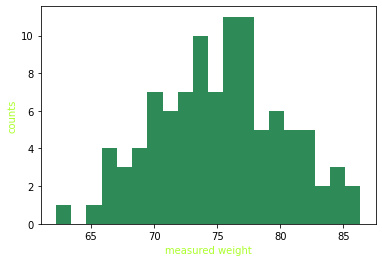

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# Based on what you said in last cell: "The average apples is between 70-100 g", I considered 75g for avg and add 75 to the numbers of the "data" which has normal numbers.
weight = 75
data = np.random.normal(0, 5, 100) + 75
data.sort()
print(data)

plt.hist(data, bins=20, color='SeaGreen')
plt.xlabel("measured weight", color='GreenYellow') 
plt.ylabel("counts", color='GreenYellow') 
plt.show()

2) Find the average weight of the apple.
Is it a good guess? state your reason.

In [2]:
data.mean()

75.29904007767243

<font color="Salmon">
    Average is 75.299 ~ 75.3 by 100 times weighting.<br>
    Actual weight is 75.<br>
    So it's a good guess.
</font>

3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?

b) do the grid approximation and complete the cell below

<font color="LightBlue">
      a) Why did we use log likelihood? Is it ok to do so?<br>
</font>
<font color="Salmon">
      Log is an increasing function, so it's ok.
</font>

In [3]:
from scipy.stats import norm

"""
# Calculate the maximum likelihood estimate of a parameter in a normal distribution.
# First calculate the log likelihoods for a range of weight guesses.
# For each weight guess, assume that the data comes from a normal distribution with that mean and a standard deviation of 10.
# Then calculate the log of the probability density function (pdf) of the data under this assumption.
# The sum of these log pdf values is the total log likelihood for that weight guess.
# After calculating the log likelihoods for all weight guesses, find the weight guess with the maximum log likelihood.
# This is the maximum likelihood estimate of the weight.
"""

weight_grid = np.linspace(0, 100)
print("\"data\" dataframe:\n",data)
print("\n\"wight_grid\" dataframe:\n",weight_grid)

mle_weight = 0
mle_likelihood = float('-inf')
for w in weight_grid:
    likelihood = np.sum(norm.logpdf(data, w, 10))
    if likelihood > mle_likelihood:
        mle_likelihood = likelihood
        mle_weight = w
print("\nMaximum Likelihood Estimate (MLE) Weight in \"data\" dataframe:", mle_weight)

mle_weight = 0
mle_likelihood = float('-inf')
for w in weight_grid:
    likelihood = np.sum(norm.logpdf(weight_grid, w, 10))
    if likelihood > mle_likelihood:
        mle_likelihood = likelihood
        mle_weight = w
print("\nMaximum Likelihood Estimate (MLE) Weight in \"weight_grid\" dataframe:", mle_weight)

"data" dataframe:
 [62.23505092 65.09601766 66.36858699 66.46864905 66.84900827 66.93051076
 67.31878157 67.72817163 67.89991031 68.7360232  68.8258709  69.09683908
 69.1742508  69.64623689 69.75723517 70.1136106  70.46350818 70.52266719
 70.56107126 70.64601425 70.7295213  70.93426859 71.2891749  71.57594955
 71.63769776 71.82838953 72.10575168 72.44597431 72.45173909 72.80962849
 72.98411527 72.99109532 73.06336591 73.18629417 73.20223419 73.26043925
 73.44223734 73.48848625 73.9362986  73.97420868 74.06408075 74.10037582
 74.24321396 74.48390574 74.85908886 75.0525001  75.22879259 75.25972698
 75.28082671 75.33258611 75.60837508 75.63456046 75.64491455 75.72021786
 75.77473713 75.78174485 75.88713071 76.04137489 76.51235949 76.56533851
 76.66837164 76.78183199 76.8908126  76.93451249 77.00078604 77.00994682
 77.01170821 77.05299251 77.14165935 77.21931616 77.31391128 77.3283122
 78.26809298 78.53286584 78.64545281 78.80518863 78.88745178 79.32218099
 79.50413243 79.75044209 79.88319

Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

In [9]:
import numpy as np
from scipy.stats import norm, invgamma, beta


# The barrel of apples
# The average apples is between 70-100 g
BARREL = np.random.normal(loc=85, scale=20, size=100)
# Grid
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 50, 100)

# NOTE: Try changing the scale error
# in practice, you would not know this number
SCALE_ERR = 5

# NOTE: Try changing the number of measurements taken
N_MEASURMENTS = 10

# NOTE: Try changing the prior values and distributions
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)


def read_scale(apple):
    return apple + np.random.normal(loc=0, scale=SCALE_ERR)


def get_log_likelihood_grid(measurments):
    log_liklelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurments).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_liklelihood)


def get_mle(measurments):
    """
    Calculate the log-likelihood for each measurement in the grid.
    Find the index of the maximum log-likelihood in the grid.
    Return the weight guess corresponding to the maximum log-likelihood.
    """
    grid = get_log_likelihood_grid(measurments)
    max_index = np.unravel_index(grid.argmax(), grid.shape)
    return WEIGHT_GUESSES[max_index[1]]


def get_map(measurements):
    """
    Calculate the log-likelihood for each measurement in the grid.
    Add the log prior to the log likelihood to get the log posterior.
    Find the index of the maximum log posterior in the grid.
    Return the weight guess corresponding to the maximum log posterior.
    """
    grid = get_log_likelihood_grid(measurements)
    grid += LOG_PRIOR_GRID
    max_index = np.unravel_index(grid.argmax(), grid.shape)
    return WEIGHT_GUESSES[max_index[1]]

# Pick an apple at random
apple = np.random.choice(BARREL)

# weight the apple
measurments = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])
print("SIZE = 100")
print("PRIOR = INVGAMMA")
print("SCALE_ERR = ", SCALE_ERR, end=", ")
print("N_MEASURMENTS = ", N_MEASURMENTS)
print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

print("\n******************************************************\n")

WEIGHT_GUESSES = np.linspace(1, 200, 50)
ERROR_GUESSES = np.linspace(.1, 50, 50)
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)
LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)
print("SIZE = 50")
print("PRIOR = INVGAMMA")
print("SCALE_ERR = ", SCALE_ERR, end=", ")
print("N_MEASURMENTS = ", N_MEASURMENTS)
print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

print("\n******************************************************\n")

SCALE_ERR = 5
N_MEASURMENTS = 20
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 50, 100)
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)
LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)
measurments = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])
print("SIZE = 100")
print("PRIOR = INVGAMMA")
print("SCALE_ERR = ", SCALE_ERR, end=", ")
print("N_MEASURMENTS = ", N_MEASURMENTS)
print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

print("\n******************************************************\n")

PRIOR_ERR = beta(4, 4).logpdf(ERROR_GUESSES)
LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)
SCALE_ERR = 5
N_MEASURMENTS = 20
print("SIZE = 100")
print("PRIOR = BETA")
print("SCALE_ERR = ", SCALE_ERR, end=", ")
print("N_MEASURMENTS = ", N_MEASURMENTS)
print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

print("\n******************************************************\n")

WEIGHT_GUESSES = np.linspace(1, 200, 50)
ERROR_GUESSES = np.linspace(.1, 50, 50)
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = beta(4, 4).logpdf(ERROR_GUESSES)
LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)
SCALE_ERR = 5
N_MEASURMENTS = 20
print("SIZE = 50")
print("PRIOR = BETA")
print("SCALE_ERR = ", SCALE_ERR, end=", ")
print("N_MEASURMENTS = ", N_MEASURMENTS)
print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

print("\n******************************************************\n")

WEIGHT_GUESSES = np.linspace(1, 200, 50)
ERROR_GUESSES = np.linspace(.1, 50, 50)
PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)
LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)
SCALE_ERR = 5
N_MEASURMENTS = 20
print("SIZE = 50")
print("PRIOR = INVGAMMA")
print("SCALE_ERR = ", SCALE_ERR, end=", ")
print("N_MEASURMENTS = ", N_MEASURMENTS)
print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

print("\n******************************************************\n")

SIZE = 100
PRIOR = INVGAMMA
SCALE_ERR =  5, N_MEASURMENTS =  10
Average measurement: 85.014 g
Maximum Likelihood estimate: 85.424 g
Maximum A Posterior estimate: 51.253 g
The true weight of the apple was: 86.488 g

******************************************************

SIZE = 50
PRIOR = INVGAMMA
SCALE_ERR =  5, N_MEASURMENTS =  10
Average measurement: 85.014 g
Maximum Likelihood estimate: 86.286 g
Maximum A Posterior estimate: 49.735 g
The true weight of the apple was: 86.488 g

******************************************************

SIZE = 100
PRIOR = INVGAMMA
SCALE_ERR =  5, N_MEASURMENTS =  20
Average measurement: 85.797 g
Maximum Likelihood estimate: 85.424 g
Maximum A Posterior estimate: 51.253 g
The true weight of the apple was: 86.488 g

******************************************************

SIZE = 100
PRIOR = BETA
SCALE_ERR =  5, N_MEASURMENTS =  20
Average measurement: 85.797 g
Maximum Likelihood estimate: 85.424 g
Maximum A Posterior estimate: 85.424 g
The true weight of th

<h3><i><i> Questions</h3>
1.
How sensitive is the MAP measurement to the choice of prior?

<font color="Salmon">
      It's very sensetive based on last part.<br>
       For example Beta improve the guess and it's really better than invgamma.
</font>

<h3><i><i></h3>
2. How sensitive is the MLE and MAP answer to the grid size?


<font color="Salmon">
      MLE is more sensetive to grid size than MAP.<br>
      Generally if we increase the size of the grid, the estimation with be much closer to the real weight of the apple.
</font>